In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from my_style import set_journal_style

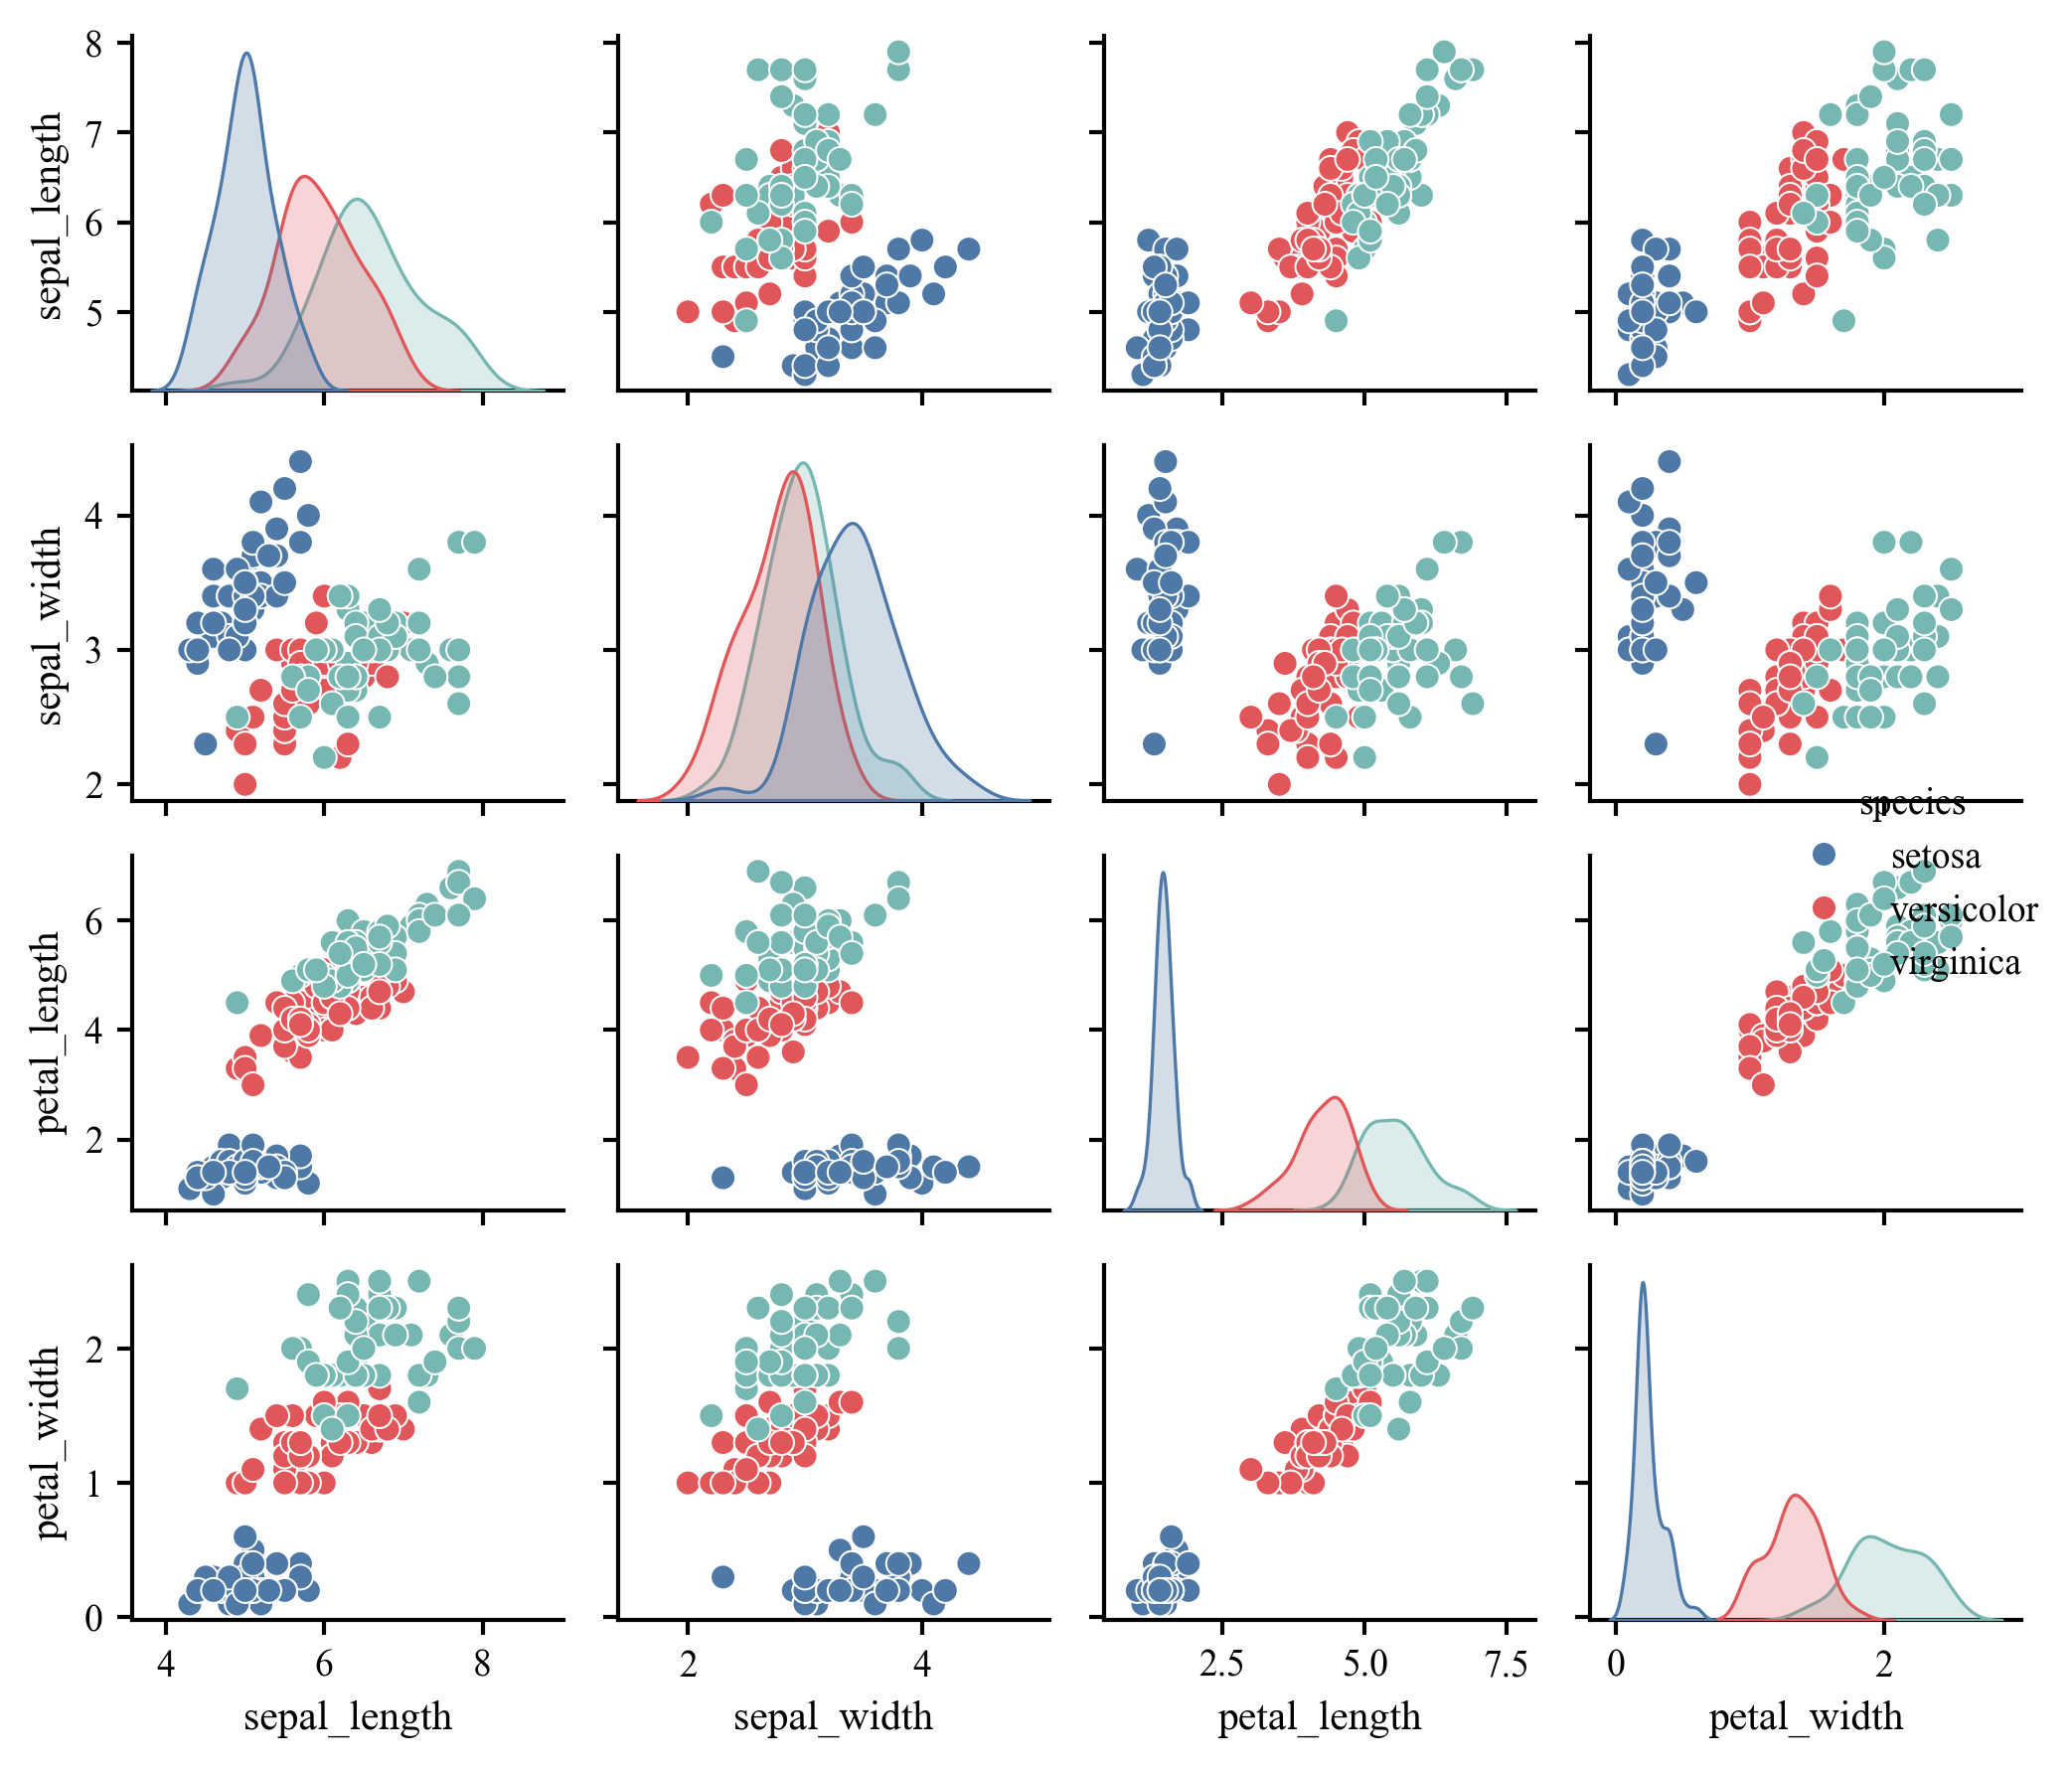

In [52]:
iris = sns.load_dataset('iris')

sns.pairplot(iris,hue='species',height=1.5)
plt.tight_layout()
plt.show()

In [53]:
X_iris = iris.drop('species',axis=1)
y_iris = iris['species']
print(X_iris.head())
print(y_iris.head())

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object


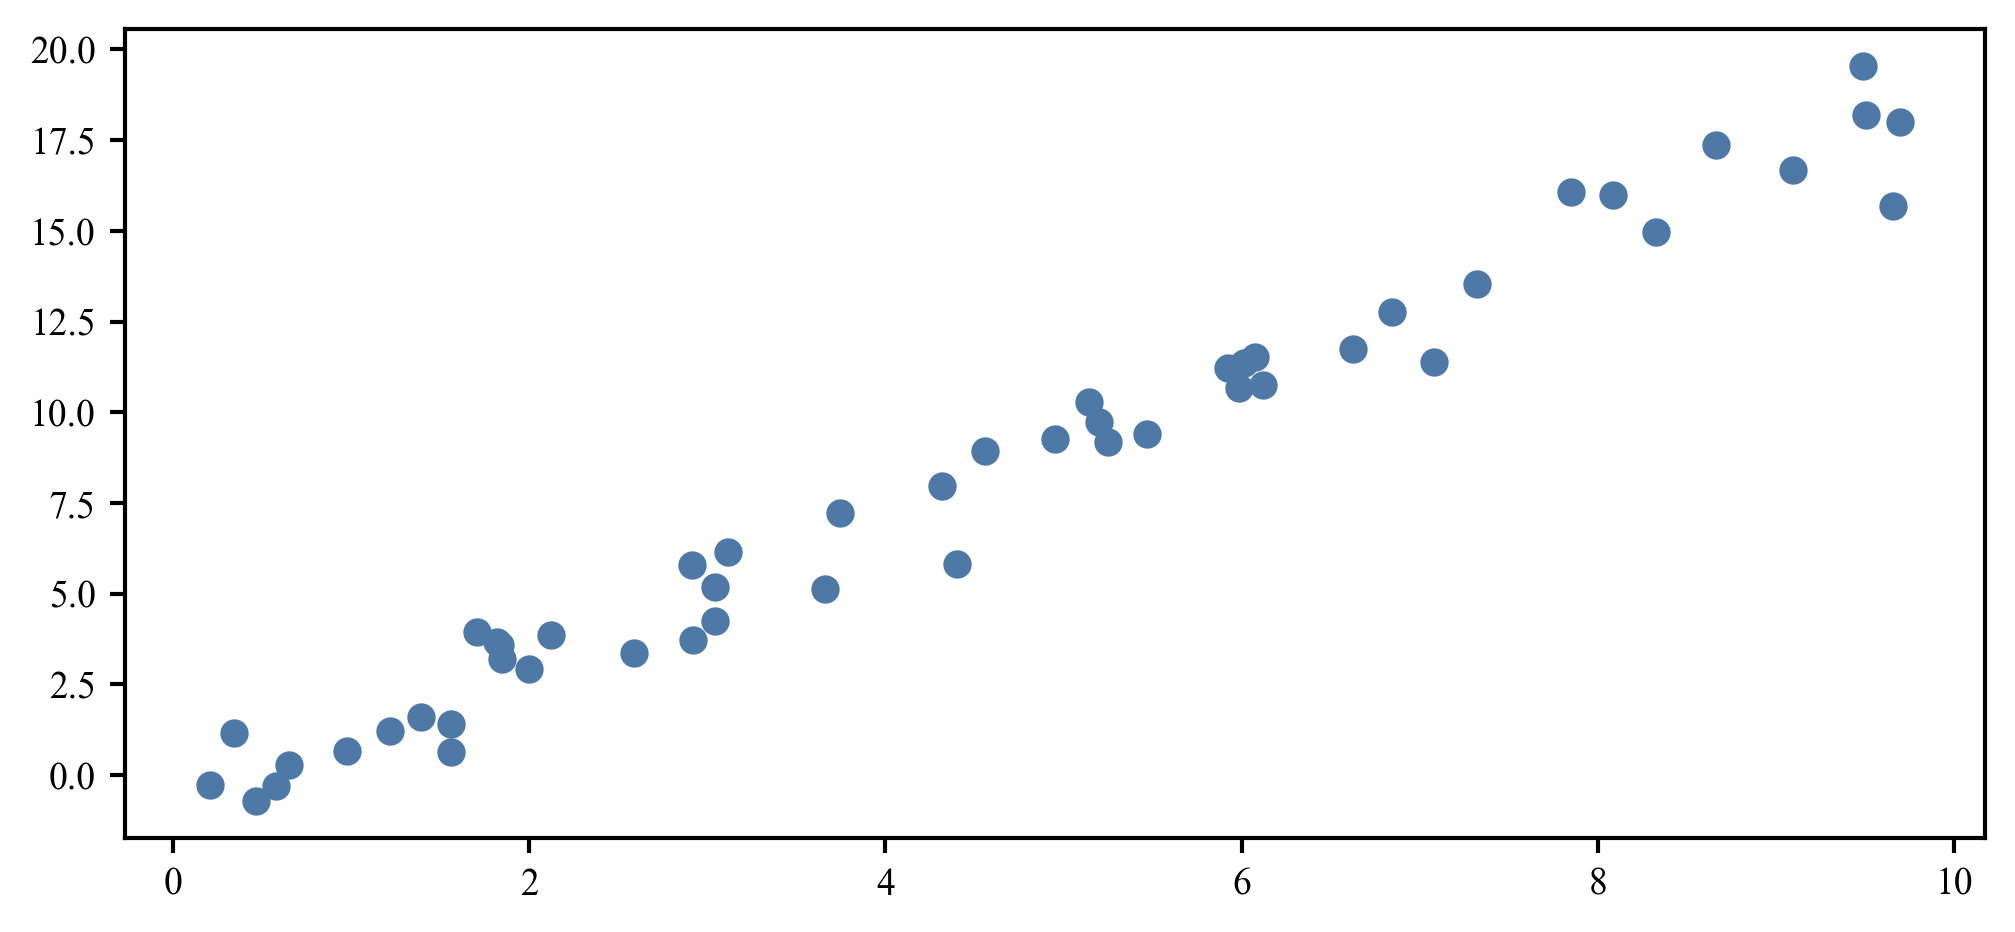

In [54]:
# API评估器
# 回归
rng = np.random.RandomState(42)
x = 10*rng.rand(50)
y = 2*x-1+rng.randn(50)
def sc():
    set_journal_style()
    plt.scatter(x,y)
sc()

y=(2)x+(-1)


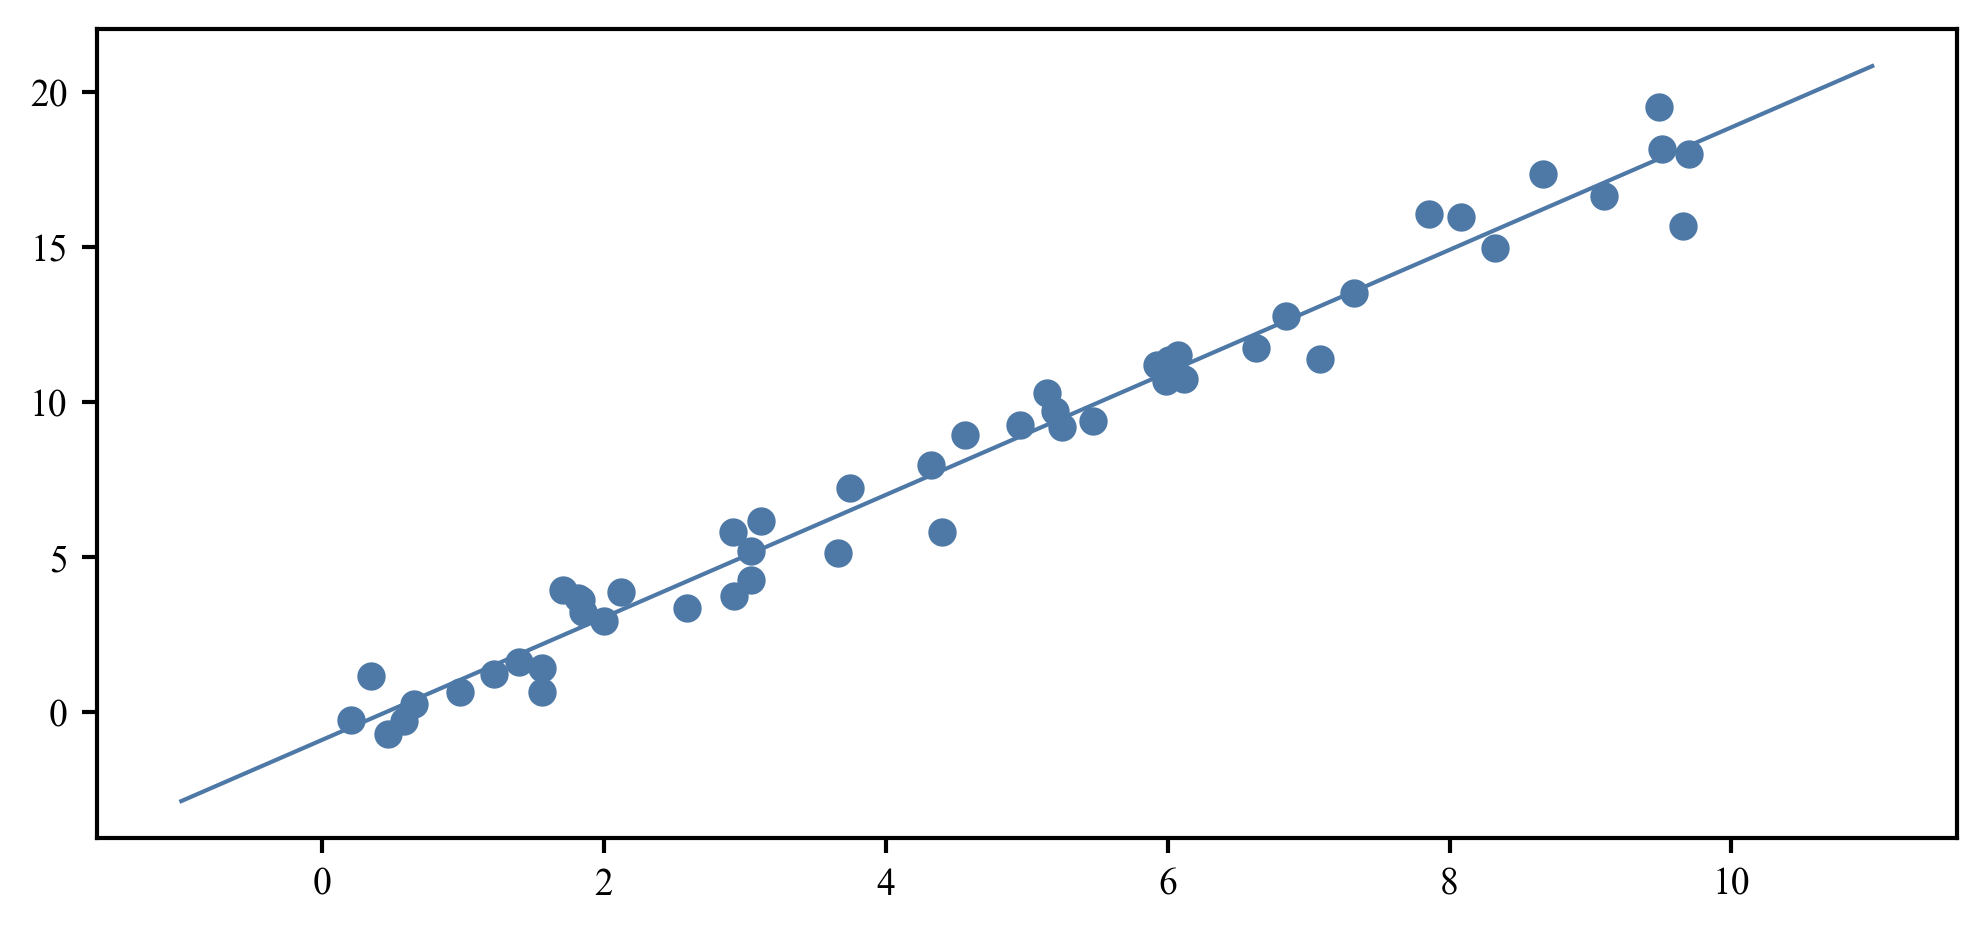

In [55]:
# 选择模型类-简单线性回归
from sklearn.linear_model import LinearRegression
# 选择模型超参数
model = LinearRegression(fit_intercept=True)
# 整理数据-获取特征矩阵和目标数组
X = x[:,np.newaxis]
# 模型拟合数据
model.fit(X,y)
a = model.coef_
b = model.intercept_
print(f'y=({a[0]:.0f})x+({b:.0f})')
# 预测数据
xfit = np.linspace(-1,11)
Xfit = xfit[:,np.newaxis]
yfit = model.predict(Xfit)
def sc():
    set_journal_style()
    plt.scatter(x,y)
    plt.plot(xfit,yfit)
sc()

In [56]:
# 分类
# 整理数据
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X_iris,y_iris,random_state=1)
# 选择模型类
from sklearn.naive_bayes import GaussianNB
# 初始化模型
model = GaussianNB()
# 用模型拟合数据
model.fit(Xtrain,ytrain)
# 对数据预测
y_model = model.predict(Xtest)
# 准确性检验
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_model)

0.9736842105263158

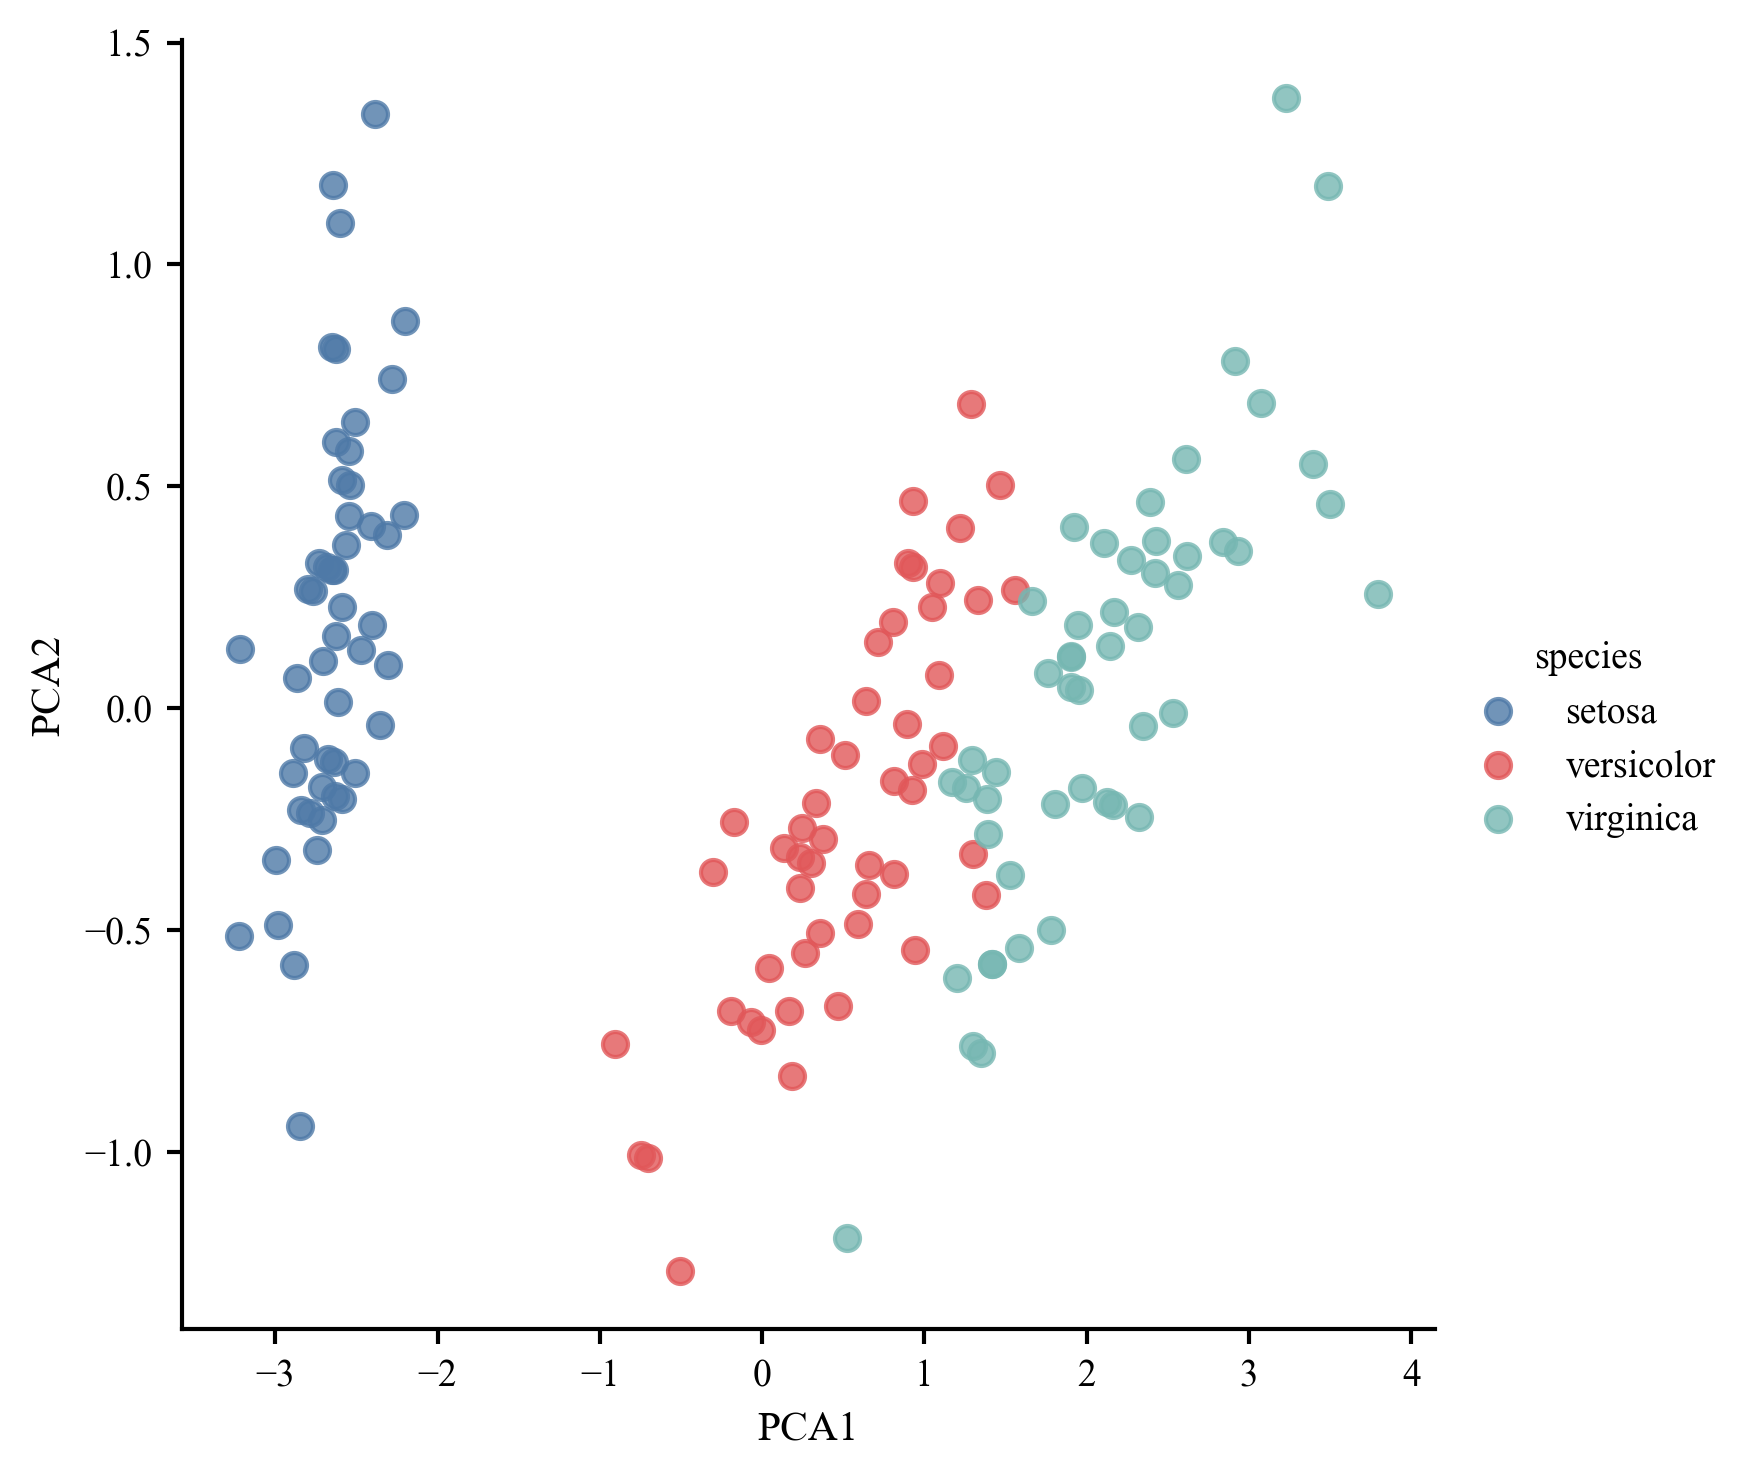

In [57]:
# 降维
# 选择模型类
from sklearn.decomposition import PCA
# 初始化模型
model = PCA(n_components=2)
# 用模型拟合数据
model.fit(X_iris)
# 对数据转换为二维
X_2D = model.transform(X_iris)
# 绘图
iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]
set_journal_style()
# 正确调用 lmplot
sns.lmplot(
    x='PCA1',          # 显式指定 x 轴字段
    y='PCA2',          # 显式指定 y 轴字段
    hue='species',     # 按类别着色
    data=iris,         # 数据集
    fit_reg=False      # 关闭回归线
)
plt.show()

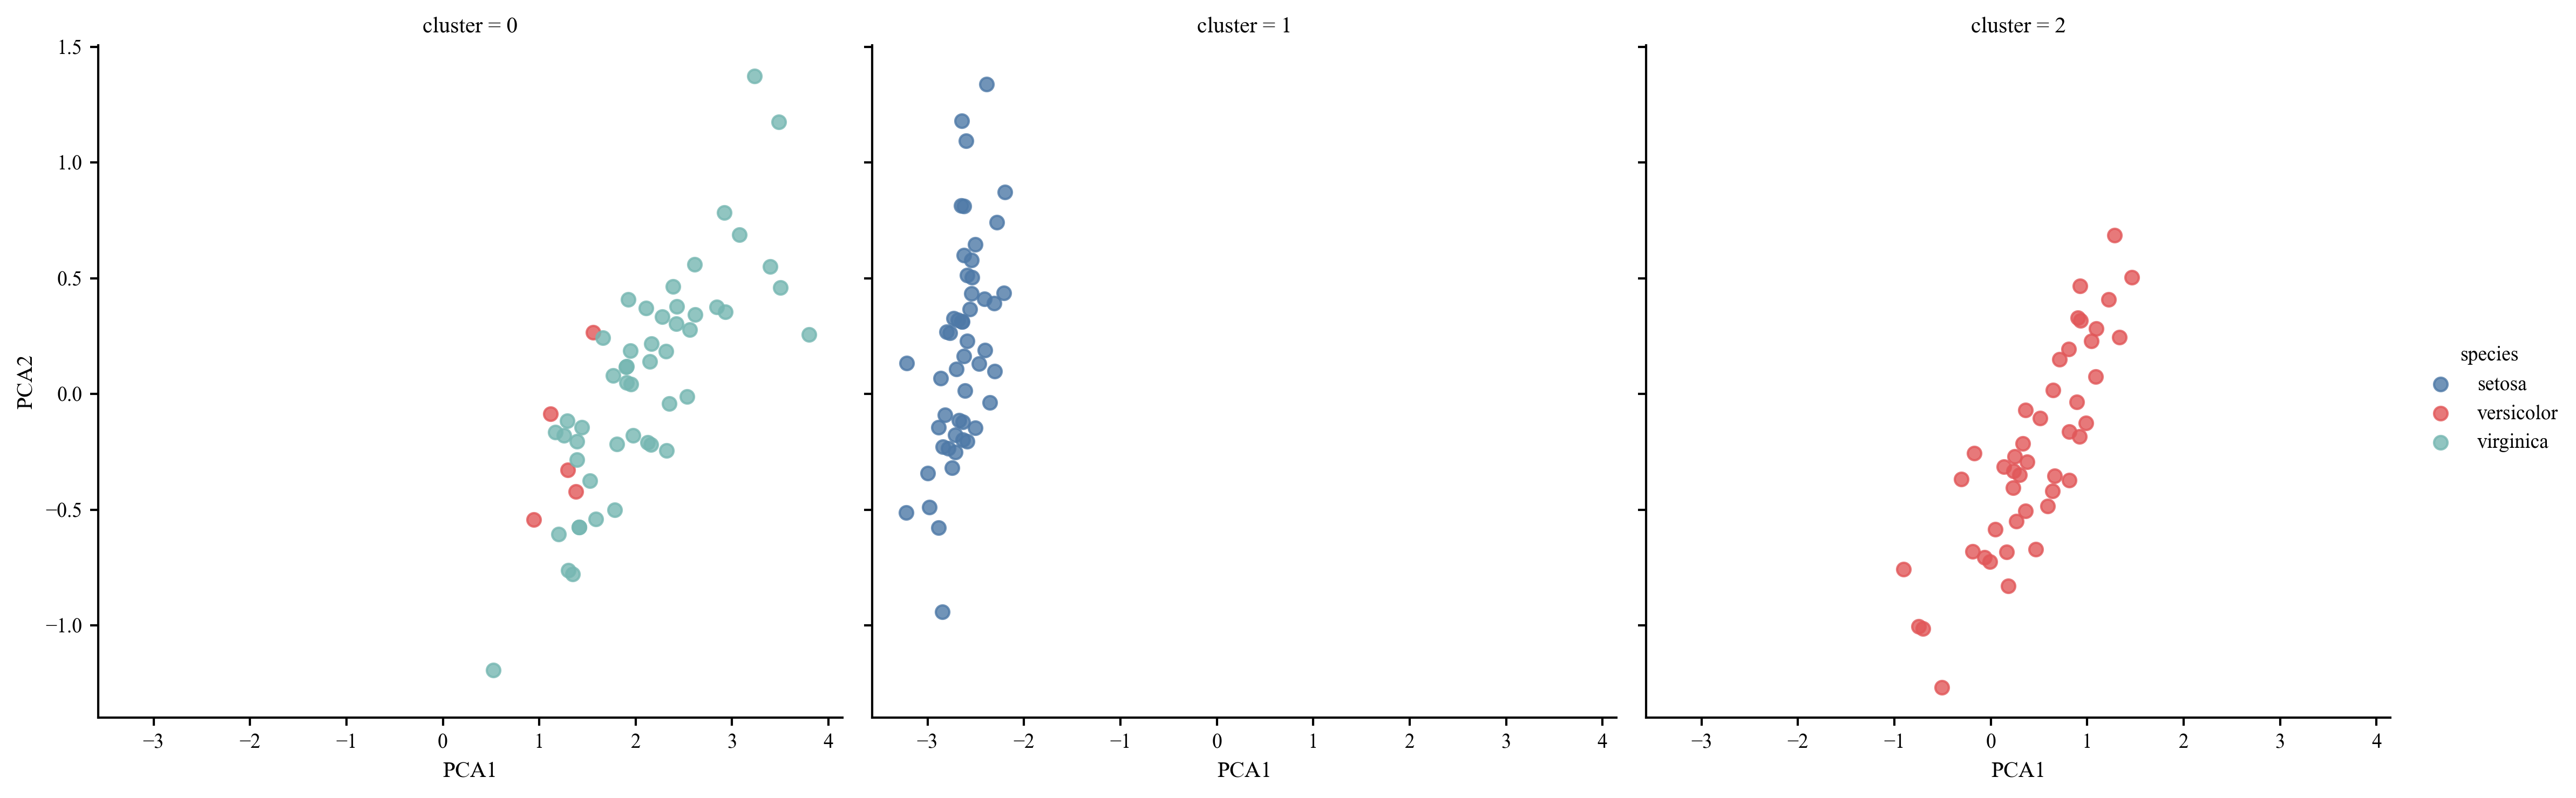

In [62]:
# 聚类
# 选择模型类
from sklearn.mixture import GaussianMixture
# 初始化模型
model = GaussianMixture(n_components=3,
                        covariance_type='full')
# 用模型拟合数据
model.fit(X_iris)
# 确定簇标签
y_gmm = model.predict(X_iris)
# 绘图
iris['cluster'] = y_gmm
sns.lmplot(
    x='PCA1',          # 显式指定 x 轴字段
    y='PCA2',          # 显式指定 y 轴字段
    hue='species',     # 按类别着色
    data=iris,
    col='cluster',
    fit_reg=False      # 关闭回归线
)
plt.show()